# GARCH Model for Predicting Bitcoin Volatility

Generalized Autoregressive Conditional Heteroskedasticity models are used to predict the volatility of financial time series, accounting for changing variances over time.


### Features

- GARCH model implementation for volatility forecasting.
- Visualization of actual returns and therefore volatility.
- Rolling forecast analysis to evaluate model performance over time.
- Future volatility prediction for a specified number of days.

In [1]:
import warnings
warnings.filterwarnings('ignore')

!pip install arch

import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf

Defaulting to user installation because normal site-packages is not writeable


### Visualization of BTC actual returns


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'BTC Returns')

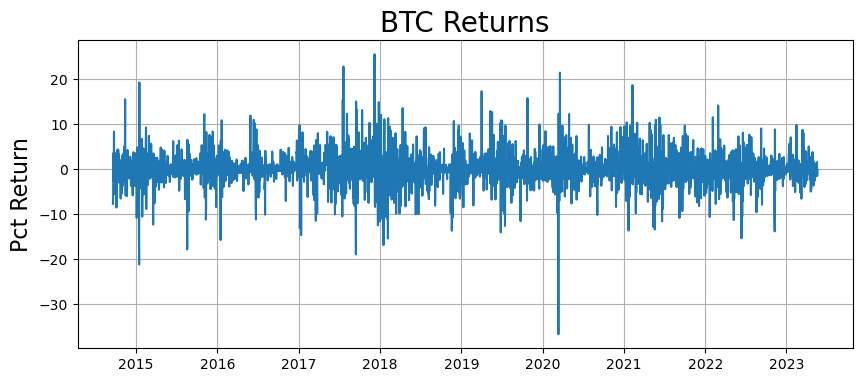

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)
df=yf.download(tickers='BTC-EUR', start = '2010-01-1', end= '2023-05-21')
returns = 100 * df.Close.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.grid(True)
plt.ylabel('Pct Return', fontsize=16)
plt.title('BTC Returns', fontsize=20)

### Definition of (p,q) parameters 
- Use of the PACF indicator to define the baseline p and q.

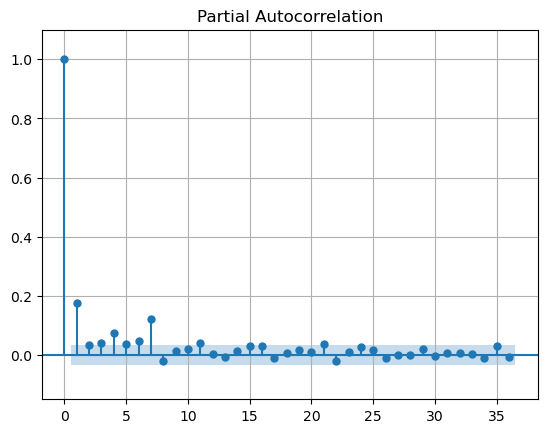

We can try p=2 and q=2.


In [11]:
plot_pacf(returns**2)
plt.grid(True)
plt.ylim(-0.15,1.1)
plt.show()

print('We can try p=2 and q=2.')

### GARCH model 
- Fit GARCH(2,2)

In [4]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 17589.649556238557
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9551.996573118067
Iteration:      3,   Func. Count:     27,   Neg. LLF: 9415.36954179531
Iteration:      4,   Func. Count:     36,   Neg. LLF: 8677.173486964944
Iteration:      5,   Func. Count:     44,   Neg. LLF: 8456.097196581173
Iteration:      6,   Func. Count:     52,   Neg. LLF: 8547.160433727662
Iteration:      7,   Func. Count:     60,   Neg. LLF: 8496.201009964065
Iteration:      8,   Func. Count:     68,   Neg. LLF: 8442.096369607805
Iteration:      9,   Func. Count:     75,   Neg. LLF: 8441.42443659146
Iteration:     10,   Func. Count:     82,   Neg. LLF: 8441.38966461933
Iteration:     11,   Func. Count:     90,   Neg. LLF: 8441.204224243516
Iteration:     12,   Func. Count:     97,   Neg. LLF: 8441.203713763118
Iteration:     13,   Func. Count:    105,   Neg. LLF: 8441.20257298573
Iteration:     14,   Func. Count:    112,   Neg. LLF: 8441.20256836

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8441.20
Distribution:                  Normal   AIC:                           16894.4
Method:            Maximum Likelihood   BIC:                           16930.8
                                        No. Observations:                 3167
Date:                Sat, May 27 2023   Df Residuals:                     3166
Time:                        13:13:53   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1939  5.352e-02      3.624  2.901e-04 [8.905e-02,  0.299]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8202      0.450      1.821  6.855e-02 [-6.243e-02,  1.703]
alpha[1]       0.1501  4.515e-02      3.324  8.866e-04  [6.160e-02,  0.239]
alpha[2]       0.0000  9.371e-02      0.000      1.000    [ -0.184,  0.184]
beta[1]        0.5230      0.231      2.268  2.332e-02  [7.106e-02,  0.975]
beta[2]        0.2799      0.157      1.780  7.508e-02 [-2.830e-02,  0.588]
===========================================================================

Covariance estimator: robust
"""

### GARCH model refinement 
- Fit GARCH(1,2)

In [5]:
model = arch_model(returns, p=1, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 18077.809210058986
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9017.226070422259
Iteration:      3,   Func. Count:     24,   Neg. LLF: 829982235.9679484
Iteration:      4,   Func. Count:     31,   Neg. LLF: 8732.780415279856
Iteration:      5,   Func. Count:     38,   Neg. LLF: 8458.832209592096
Iteration:      6,   Func. Count:     45,   Neg. LLF: 57513.97926686739
Iteration:      7,   Func. Count:     53,   Neg. LLF: 8502.462205353691
Iteration:      8,   Func. Count:     61,   Neg. LLF: 8469.325312611636
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8441.218161471372
Iteration:     10,   Func. Count:     74,   Neg. LLF: 8441.203060306067
Iteration:     11,   Func. Count:     80,   Neg. LLF: 8441.202595554932
Iteration:     12,   Func. Count:     86,   Neg. LLF: 8441.202568399633
Iteration:     13,   Func. Count:     91,   Neg. LLF: 8441.202568399363
Optimization terminated successfully    (Exit mode 0)
         

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8441.20
Distribution:                  Normal   AIC:                           16892.4
Method:            Maximum Likelihood   BIC:                           16922.7
                                        No. Observations:                 3167
Date:                Sat, May 27 2023   Df Residuals:                     3166
Time:                        13:13:53   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1939  5.392e-02      3.597  3.219e-04 [8.827e-02,  0.300]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8203      0.269      3.052  2.277e-03   [  0.293,  1.347]
alpha[1]       0.1501  3.138e-02      4.784  1.721e-06 [8.860e-02,  0.212]
beta[1]        0.5229      0.142      3.671  2.413e-04   [  0.244,  0.802]
beta[2]        0.2799      0.136      2.064  3.904e-02 [1.407e-02,  0.546]
==========================================================================

Covariance estimator: robust
"""

### Rolling forecast analysis:
- GARCH(1,2) prediction

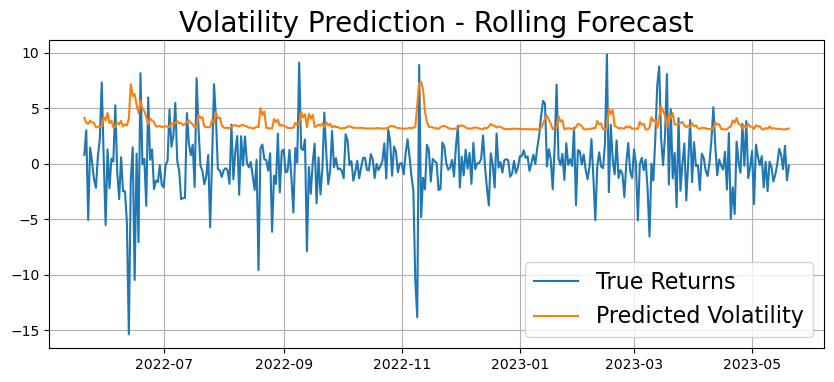

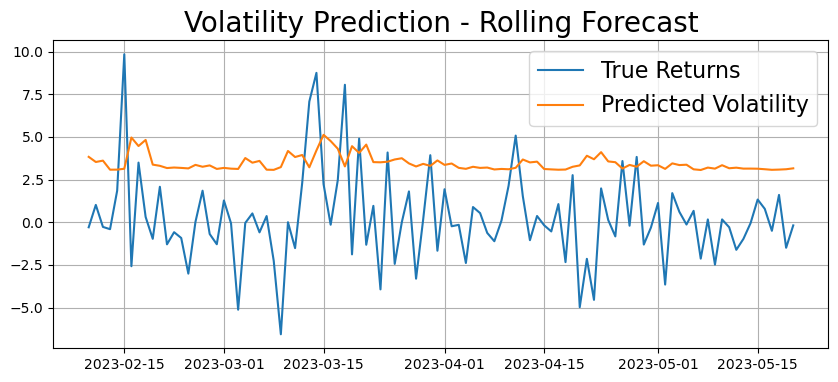

In [6]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.grid(True)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)


plt.figure(figsize=(10,4))
plt.grid(True)
true, = plt.plot(returns[-100:])
preds, = plt.plot(rolling_predictions[-100:])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)


### How to use the model 
- Prediction over the next 7days

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

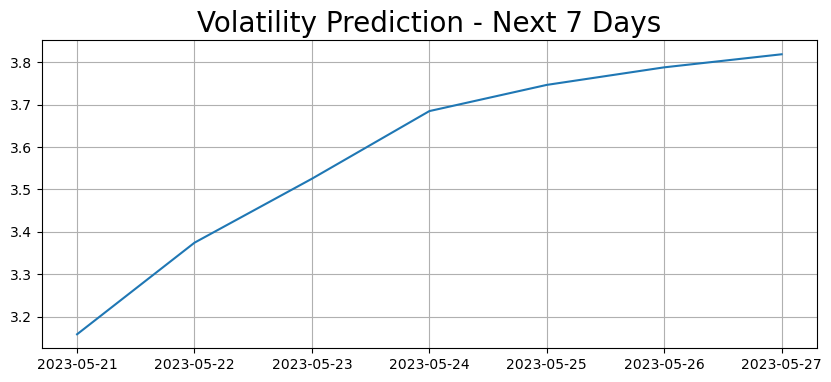

In [7]:
train = returns
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.grid(True)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
 